In [60]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [61]:
# open several csv files: results/{default, cap, danish, decima}/tpch_{job_num}/times_{0,1,2,3}.csv
# parse datetimes for the 'start_time' and 'end_time' columns
job_num = 100

baseline_0 = pd.read_csv(f'results/default/tpch_{job_num}/times_0.csv', parse_dates=['start_time', 'end_time'])
baseline_1 = pd.read_csv(f'results/default/tpch_{job_num}/times_1.csv', parse_dates=['start_time', 'end_time'])
baseline_2 = pd.read_csv(f'results/default/tpch_{job_num}/times_2.csv', parse_dates=['start_time', 'end_time'])
baseline_3 = pd.read_csv(f'results/default/tpch_{job_num}/times_3.csv', parse_dates=['start_time', 'end_time'])

cap_0 = pd.read_csv(f'results/cap/tpch_{job_num}/times_0.csv', parse_dates=['start_time', 'end_time'])
cap_1 = pd.read_csv(f'results/cap/tpch_{job_num}/times_1.csv', parse_dates=['start_time', 'end_time'])
cap_2 = pd.read_csv(f'results/cap/tpch_{job_num}/times_2.csv', parse_dates=['start_time', 'end_time'])
cap_3 = pd.read_csv(f'results/cap/tpch_{job_num}/times_3.csv', parse_dates=['start_time', 'end_time'])

danish_0 = pd.read_csv(f'results/danish/tpch_{job_num}/times_0.csv', parse_dates=['start_time', 'end_time'])
danish_1 = pd.read_csv(f'results/danish/tpch_{job_num}/times_1.csv', parse_dates=['start_time', 'end_time'])
danish_2 = pd.read_csv(f'results/danish/tpch_{job_num}/times_2.csv', parse_dates=['start_time', 'end_time'])
danish_3 = pd.read_csv(f'results/danish/tpch_{job_num}/times_3.csv', parse_dates=['start_time', 'end_time'])

decima_0 = pd.read_csv(f'results/decima/tpch_{job_num}/times_0.csv', parse_dates=['start_time', 'end_time'])
decima_1 = pd.read_csv(f'results/decima/tpch_{job_num}/times_1.csv', parse_dates=['start_time', 'end_time'])
decima_2 = pd.read_csv(f'results/decima/tpch_{job_num}/times_2.csv', parse_dates=['start_time', 'end_time'])
decima_3 = pd.read_csv(f'results/decima/tpch_{job_num}/times_3.csv', parse_dates=['start_time', 'end_time'])

# drop rows that have no data
baseline_0 = baseline_0.dropna()
baseline_1 = baseline_1.dropna()
baseline_2 = baseline_2.dropna()
baseline_3 = baseline_3.dropna()

cap_0 = cap_0.dropna()
cap_1 = cap_1.dropna()
cap_2 = cap_2.dropna()
cap_3 = cap_3.dropna()

danish_0 = danish_0.dropna()
danish_1 = danish_1.dropna()
danish_2 = danish_2.dropna()
danish_3 = danish_3.dropna()

decima_0 = decima_0.dropna()
decima_1 = decima_1.dropna()
decima_2 = decima_2.dropna()
decima_3 = decima_3.dropna()

dfs = [baseline_0, baseline_1, baseline_2, baseline_3, cap_0, cap_1, cap_2, cap_3, danish_0, danish_1, danish_2, danish_3, decima_0, decima_1, decima_2, decima_3]

# view the head of first 4
print(baseline_0.head())
print(cap_0.head())
print(danish_0.head())
print(decima_0.head())

   job_id                 start_time                   end_time  \
0       0 2024-12-09 14:29:09.485403 2024-12-09 14:29:56.242725   
1       1 2024-12-09 14:29:31.703451 2024-12-09 14:30:12.301128   
2       2 2024-12-09 14:30:26.109226 2024-12-09 14:34:45.034004   
3       3 2024-12-09 14:31:32.341610 2024-12-09 14:32:10.514949   
4       4 2024-12-09 14:31:42.937036 2024-12-09 14:33:57.544592   

   carbon_footprint                                          executors  
0        196.611333  [('29:39', 'tpc-h-v3-0-0-spark-379c5193abd32f7...  
1         98.305667  [('29:56', 'tpc-h-v3-0-0-spark-630c0e93abd37b9...  
2       2557.817167  [('30:51', 'tpc-h-v3-0-0-spark-8aa23193abd44d9...  
3         27.386000  [('31:56', 'tpc-h-v3-0-0-spark-4e93ac93abd5512...  
4        495.014000  [('32:10', 'tpc-h-v3-0-0-spark-5585f093abd57d2...  
   job_id                 start_time                   end_time  \
0       0 2024-12-09 15:32:23.088049 2024-12-09 15:33:15.982232   
1       1 2024-12-09 15:3

In [74]:
# for each of the four dataframes, compute the total carbon footprint for the first 20 rows (sum of all the carbon footprints)
total_carbon_baseline = baseline_0['carbon_footprint'].head(100).sum()
total_carbon_cap = cap_0['carbon_footprint'].head(100).sum()
total_carbon_danish = danish_0['carbon_footprint'].head(100).sum()
total_carbon_decima = decima_0['carbon_footprint'].head(100).sum()

# print the results
print('Total Carbon Footprint for baseline:', total_carbon_baseline)
print('Total Carbon Footprint for cap:', total_carbon_cap)
print('Total Carbon Footprint for danish:', total_carbon_danish)
print('Total Carbon Footprint for decima:', total_carbon_decima)


Total Carbon Footprint for baseline: 63676.3825
Total Carbon Footprint for cap: 60005.12983333343
Total Carbon Footprint for danish: 70650.43866666665
Total Carbon Footprint for decima: 62343.223666666694


In [75]:
# do the same thing for the _1 files
total_carbon_baseline_1 = baseline_1['carbon_footprint'].head(100).sum()
total_carbon_cap_1 = cap_1['carbon_footprint'].head(100).sum()
total_carbon_danish_1 = danish_1['carbon_footprint'].head(100).sum()
total_carbon_decima_1 = decima_1['carbon_footprint'].head(100).sum()

# print the results
print('Total Carbon Footprint for baseline_1:', total_carbon_baseline_1)
print('Total Carbon Footprint for cap_1:', total_carbon_cap_1)
print('Total Carbon Footprint for danish_1:', total_carbon_danish_1)
print('Total Carbon Footprint for decima_1:', total_carbon_decima_1)

Total Carbon Footprint for baseline_1: 66418.20700000002
Total Carbon Footprint for cap_1: 63388.09883333338
Total Carbon Footprint for danish_1: 65521.03916666671
Total Carbon Footprint for decima_1: 61607.74716666669


In [76]:
# and the same for the _2 files
total_carbon_baseline_2 = baseline_2['carbon_footprint'].head(100).sum()
total_carbon_cap_2 = cap_2['carbon_footprint'].head(100).sum()
total_carbon_danish_2 = danish_2['carbon_footprint'].head(100).sum()
total_carbon_decima_2 = decima_2['carbon_footprint'].head(100).sum()

# print the results
print('Total Carbon Footprint for baseline_2:', total_carbon_baseline_2)
print('Total Carbon Footprint for cap_2:', total_carbon_cap_2)
print('Total Carbon Footprint for danish_2:', total_carbon_danish_2)
print('Total Carbon Footprint for decima_2:', total_carbon_decima_2)

Total Carbon Footprint for baseline_2: 50343.305666666674
Total Carbon Footprint for cap_2: 49022.564
Total Carbon Footprint for danish_2: 43433.16750000001
Total Carbon Footprint for decima_2: 39505.44516666667


In [77]:
# and the same for the _3 files
total_carbon_baseline_3 = baseline_3['carbon_footprint'].head(100).sum()
total_carbon_cap_3 = cap_3['carbon_footprint'].head(100).sum()
total_carbon_danish_3 = danish_3['carbon_footprint'].head(100).sum()
total_carbon_decima_3 = decima_3['carbon_footprint'].head(100).sum()

# print the results
print('Total Carbon Footprint for baseline_3:', total_carbon_baseline_3)
print('Total Carbon Footprint for cap_3:', total_carbon_cap_3)
print('Total Carbon Footprint for danish_3:', total_carbon_danish_3)
print('Total Carbon Footprint for decima_3:', total_carbon_decima_3)

Total Carbon Footprint for baseline_3: 57455.876500000064
Total Carbon Footprint for cap_3: 67274.74016666673
Total Carbon Footprint for danish_3: 54663.51816666671
Total Carbon Footprint for decima_3: 72984.2103333334


In [78]:
# compute average across all files
average_carbon_baseline = (total_carbon_baseline + total_carbon_baseline_1 + total_carbon_baseline_2 + total_carbon_baseline_3) / 4
average_carbon_cap = (total_carbon_cap + total_carbon_cap_1 + total_carbon_cap_2 + total_carbon_cap_3) / 4
average_carbon_danish = (total_carbon_danish + total_carbon_danish_1 + total_carbon_danish_2 + total_carbon_danish_3) / 4
average_carbon_decima = (total_carbon_decima + total_carbon_decima_1 + total_carbon_decima_2 + total_carbon_decima_3) / 4

# print the results
print('Average Carbon Footprint for baseline:', average_carbon_baseline)
print('Average Carbon Footprint for cap:', average_carbon_cap)
print('Average Carbon Footprint for danish:', average_carbon_danish)
print('Average Carbon Footprint for decima:', average_carbon_decima)

Average Carbon Footprint for baseline: 59473.442916666696
Average Carbon Footprint for cap: 59922.633208333384
Average Carbon Footprint for danish: 58567.04087500002
Average Carbon Footprint for decima: 59110.15658333336


In [79]:
# for each of the four dataframes, compute the total time
# total time is the difference between start_time in the first row and the end_time in the last row
# all of these are datetime objects
total_time_baseline = baseline_0['end_time'].head(job_num).iloc[-1] - baseline_0['start_time'].head(job_num).iloc[0]
total_time_cap = cap_0['end_time'].head(job_num).iloc[-1] - cap_0['start_time'].head(job_num).iloc[0]
total_time_danish = danish_0['end_time'].head(job_num).iloc[-1] - danish_0['start_time'].head(job_num).iloc[0]
total_time_decima = decima_0['end_time'].head(job_num).iloc[-1] - decima_0['start_time'].head(job_num).iloc[0]

# print the results (just the hours, minutes, etc -- days are irrelevant)
print('Total Time for baseline:   ', total_time_baseline)
print('Total Time for cap:        ', total_time_cap)
print('Total Time for danish:     ', total_time_danish)
print('Total Time for decima:     ', total_time_decima)

Total Time for baseline:    0 days 01:00:54.412400
Total Time for cap:         0 days 01:09:41.070889
Total Time for danish:      0 days 01:01:07.239494
Total Time for decima:      0 days 00:56:47.221763


In [80]:
# do the same time calculation for the _1 files
total_time_baseline_1 = baseline_1['end_time'].head(job_num).iloc[-1] - baseline_1['start_time'].head(job_num).iloc[0]
total_time_cap_1 = cap_1['end_time'].head(job_num).iloc[-1] - cap_1['start_time'].head(job_num).iloc[0]
total_time_danish_1 = danish_1['end_time'].head(job_num).iloc[-1] - danish_1['start_time'].head(job_num).iloc[0]
total_time_decima_1 = decima_1['end_time'].head(job_num).iloc[-1] - decima_1['start_time'].head(job_num).iloc[0]

# print the results (just the hours, minutes, etc -- days are irrelevant)
print('Total Time for baseline:   ', total_time_baseline_1)
print('Total Time for cap:        ', total_time_cap_1)
print('Total Time for danish:     ', total_time_danish_1)
print('Total Time for decima:     ', total_time_decima_1)

Total Time for baseline:    0 days 00:59:28.755595
Total Time for cap:         0 days 01:02:21.595468
Total Time for danish:      0 days 01:07:31.413016
Total Time for decima:      0 days 00:58:54.261435


In [81]:
# do the same time calculation for the _2 files
total_time_baseline_2 = baseline_2['end_time'].head(job_num).iloc[-1] - baseline_2['start_time'].head(job_num).iloc[0]
total_time_cap_2 = cap_2['end_time'].head(job_num).iloc[-1] - cap_2['start_time'].head(job_num).iloc[0]
total_time_danish_2 = danish_2['end_time'].head(job_num).iloc[-1] - danish_2['start_time'].head(job_num).iloc[0]
total_time_decima_2 = decima_2['end_time'].head(job_num).iloc[-1] - decima_2['start_time'].head(job_num).iloc[0]

# print the results (just the hours, minutes, etc -- days are irrelevant)
print('Total Time for baseline:   ', total_time_baseline_2)
print('Total Time for cap:        ', total_time_cap_2)
print('Total Time for danish:     ', total_time_danish_2)
print('Total Time for decima:     ', total_time_decima_2)

Total Time for baseline:    0 days 00:52:29.806766
Total Time for cap:         0 days 01:03:09.930424
Total Time for danish:      0 days 01:02:00.671616
Total Time for decima:      0 days 00:56:47.531638


In [82]:
# do the same time calculation for the _3 files
total_time_baseline_3 = baseline_3['end_time'].head(job_num).iloc[-1] - baseline_3['start_time'].head(job_num).iloc[0]
total_time_cap_3 = cap_3['end_time'].head(job_num).iloc[-1] - cap_3['start_time'].head(job_num).iloc[0]
total_time_danish_3 = danish_3['end_time'].head(job_num).iloc[-1] - danish_3['start_time'].head(job_num).iloc[0]
total_time_decima_3 = decima_3['end_time'].head(job_num).iloc[-1] - decima_3['start_time'].head(job_num).iloc[0]

# print the results (just the hours, minutes, etc -- days are irrelevant)
print('Total Time for baseline:   ', total_time_baseline_3)
print('Total Time for cap:        ', total_time_cap_3)
print('Total Time for danish:     ', total_time_danish_3)
print('Total Time for decima:     ', total_time_decima_3)

Total Time for baseline:    0 days 00:51:20.475750
Total Time for cap:         0 days 01:02:29.865755
Total Time for danish:      0 days 01:03:31.125449
Total Time for decima:      0 days 01:07:47.015842


In [83]:
# compute averages 
average_time_baseline = ( total_time_baseline_1 + total_time_baseline_2 + total_time_baseline_3) / 3
average_time_cap = ( total_time_cap_1 + total_time_cap_2 + total_time_cap_3) / 3
average_time_danish = ( total_time_danish_1 + total_time_danish_2 + total_time_danish_3) / 3
average_time_decima = ( total_time_decima_1 + total_time_decima_2 + total_time_decima_3) / 3

# print the results
print('Average Total Time for baseline:', average_time_baseline)
print('Average Total Time for cap:', average_time_cap)
print('Average Total Time for danish:', average_time_danish)
print('Average Total Time for decima:', average_time_decima)

Average Total Time for baseline: 0 days 00:54:26.346037
Average Total Time for cap: 0 days 01:02:40.463882333
Average Total Time for danish: 0 days 01:04:21.070027
Average Total Time for decima: 0 days 01:01:09.602971666


In [84]:
# compute average across all files
average_carbon_baseline = ( total_carbon_baseline_1 + total_carbon_baseline_2 + total_carbon_baseline_3) / 3
average_carbon_cap = ( total_carbon_cap_1 + total_carbon_cap_2 + total_carbon_cap_3) / 3
average_carbon_danish = ( total_carbon_danish_1 + total_carbon_danish_2 + total_carbon_danish_3) / 3
average_carbon_decima = ( total_carbon_decima_1 + total_carbon_decima_2 + total_carbon_decima_3) / 3

# print the results
print('Average Carbon Footprint for baseline:', average_carbon_baseline)
print('Average Carbon Footprint for cap:', average_carbon_cap)
print('Average Carbon Footprint for danish:', average_carbon_danish)
print('Average Carbon Footprint for decima:', average_carbon_decima)

Average Carbon Footprint for baseline: 58072.46305555559
Average Carbon Footprint for cap: 59895.13433333337
Average Carbon Footprint for danish: 54539.241611111145
Average Carbon Footprint for decima: 58032.467555555595


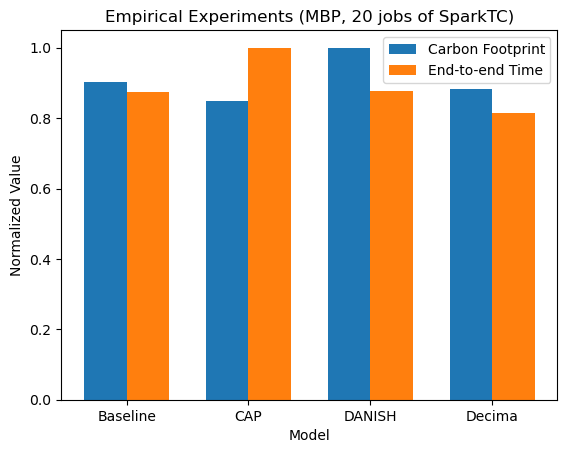

In [85]:
# plot the carbon footprint and completion time, normalized to the max of each
# bar plot in matplotlib
# make sure to label the axes and give a title
# save the plot as 'carbon_time_plot.png'

import matplotlib.pyplot as plt

carbon_data = [total_carbon_baseline, total_carbon_cap, total_carbon_danish, total_carbon_decima]
time_data = [total_time_baseline, total_time_cap, total_time_danish, total_time_decima]

carbon_data = [x / max(carbon_data) for x in carbon_data]
time_data = [x / max(time_data) for x in time_data]

fig, ax = plt.subplots()
bar_width = 0.35
index = np.arange(4)

bar1 = ax.bar(index, carbon_data, bar_width, label='Carbon Footprint')
bar2 = ax.bar(index + bar_width, time_data, bar_width, label='End-to-end Time')
legend = ['Baseline', 'CAP', 'DANISH', 'Decima']
ax.set_xlabel('Model')
ax.set_ylabel('Normalized Value')
ax.set_title('Empirical Experiments (MBP, 20 jobs of SparkTC)')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(legend)
ax.legend()
